# **CVPS20 // Galaxy Zoo Mini-Assignment**

assigned : **Oct 19, 2020**

DUE : **Oct 26, 2020 11:59pm**

## Classifying Galaxy Types with Supervised Learning

<img src="https://www.cabrillo.edu/~rnolthenius/astro8/GalZoo/TuningFork.jpg" width=500x>

---

The formation of galaxies over cosmic time results in a continuum of galaxy shapes from smooth "elliptical" galaxies to "spiral" galaxies like our own Milky Way.  Automated classification of galaxies in images from telescopes can inform large scale structure measurements that directly constrain models of cosmology and galaxy evolution.  In this assignment, you will train supervised learning models using "crowd-sourced" hand-labeling of galaxy types from the [Galaxy Zoo](http://zoo1.galaxyzoo.org/Default.aspx) project.

<b>

Rules for homeworks:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed in this notebook in the first cell below.  Direct copying from someone else's notebook is not permitted.

2. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

3. Late homeworks will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term (see CVPS20 syllabus).

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Read in the images of elliptical and spiral galaxies from the `galaxy_zoo/` folder in `cvps20/data/`.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report

In [2]:
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Ellip = np.load('/content/drive/My Drive/cvps20/data/galaxy_zoo/galaxy_zoo_elliptical.npy')
Spir = np.load('/content/drive/My Drive/cvps20/data/galaxy_zoo/galaxy_zoo_spiral.npy')

In [5]:
Ellip.shape

(5000, 106, 106, 3)

**Convert each of the 5000 elliptical and 5000 spiral galaxy images to luminosity images (be sure to normalize to `0` to `1`).**

In [6]:
EllipLum = np.mean(Ellip, 3)/255
SpirLum = np.mean(Spir, 3)/255

In [7]:
SpirLum.shape

(5000, 106, 106)

**Make a 6x6 panel plot of the first 36 elliptcal galaxies in both RGB and in luminosity.**

Text(0, 0.5, 'Common Y-Axis')

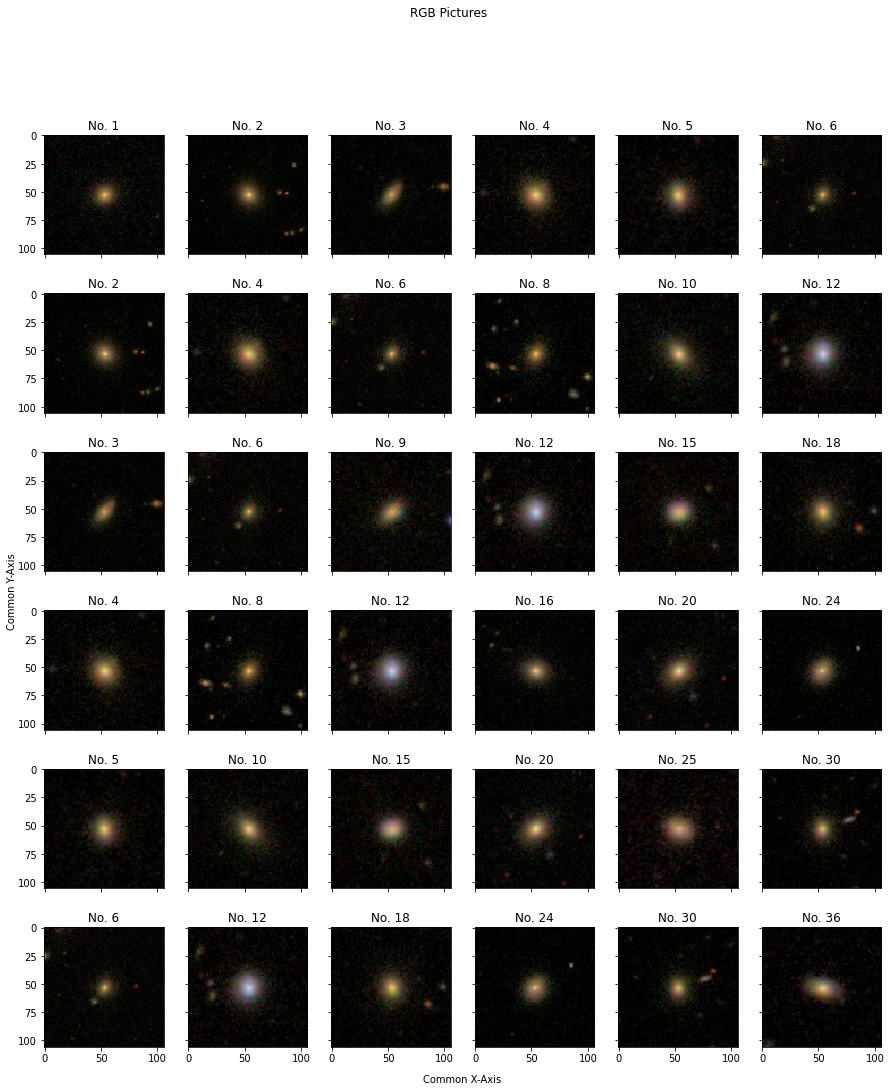

In [10]:
fig, ax = plt.subplots(6, 6, figsize=[15,17], sharex=True, sharey=True)

for II in range(1,7):
  for JJ in range(1,7):
    ax[II-1, JJ-1].imshow(Ellip[II*JJ-1, :, :, :])
    ax[II-1, JJ-1].set_title('No. {0}'.format(II*JJ))
   
plt.suptitle('RGB Pictures')

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Common X-Axis")
plt.ylabel("Common Y-Axis")



Text(0.04, 0.5, 'common Y')

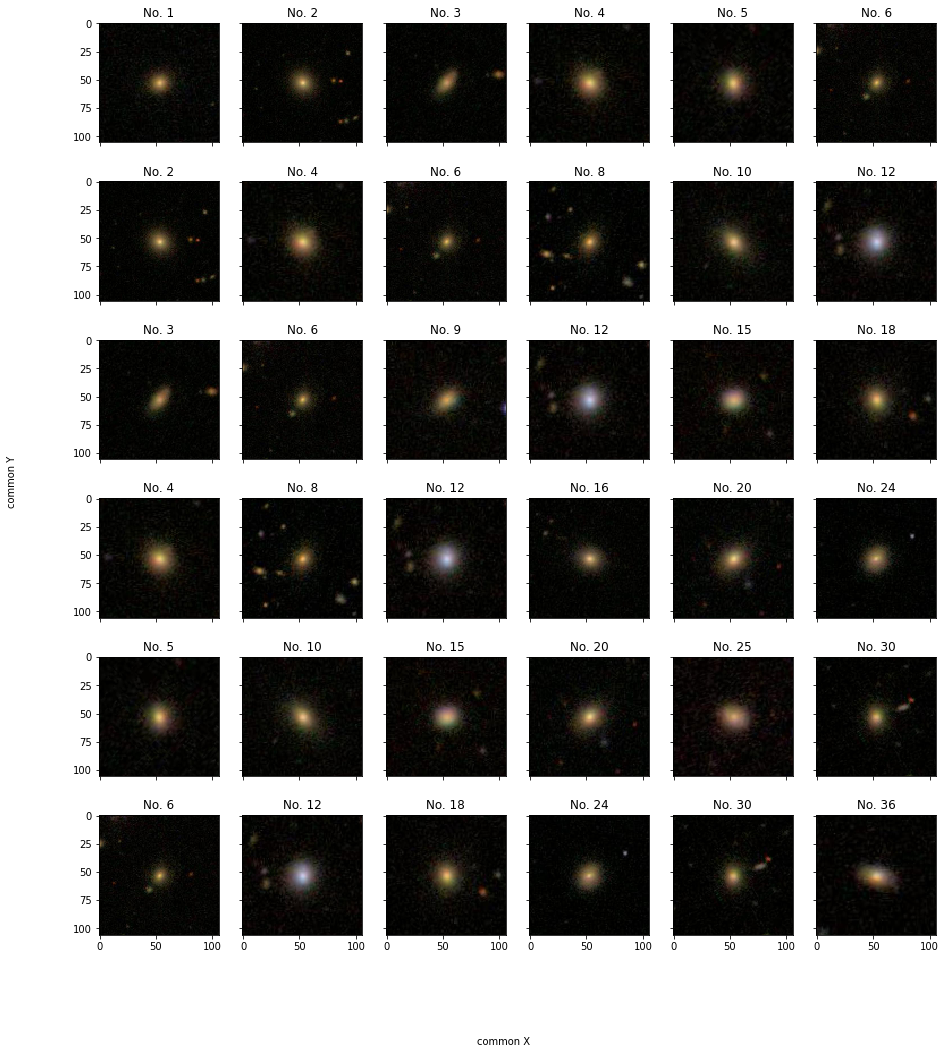

In [13]:
fig, ax = plt.subplots(6, 6, figsize=[15,17], sharex=True, sharey=True)

for II in range(1,7):
  for JJ in range(1,7):
    ax[II-1, JJ-1].imshow(Ellip[II*JJ-1, :, :, :])
    ax[II-1, JJ-1].set_title('No. {0}'.format(II*JJ))
   
# plt.suptitle('RGB Pictures')


fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')

Text(0.5, 0.98, 'Luminosity Pictures')

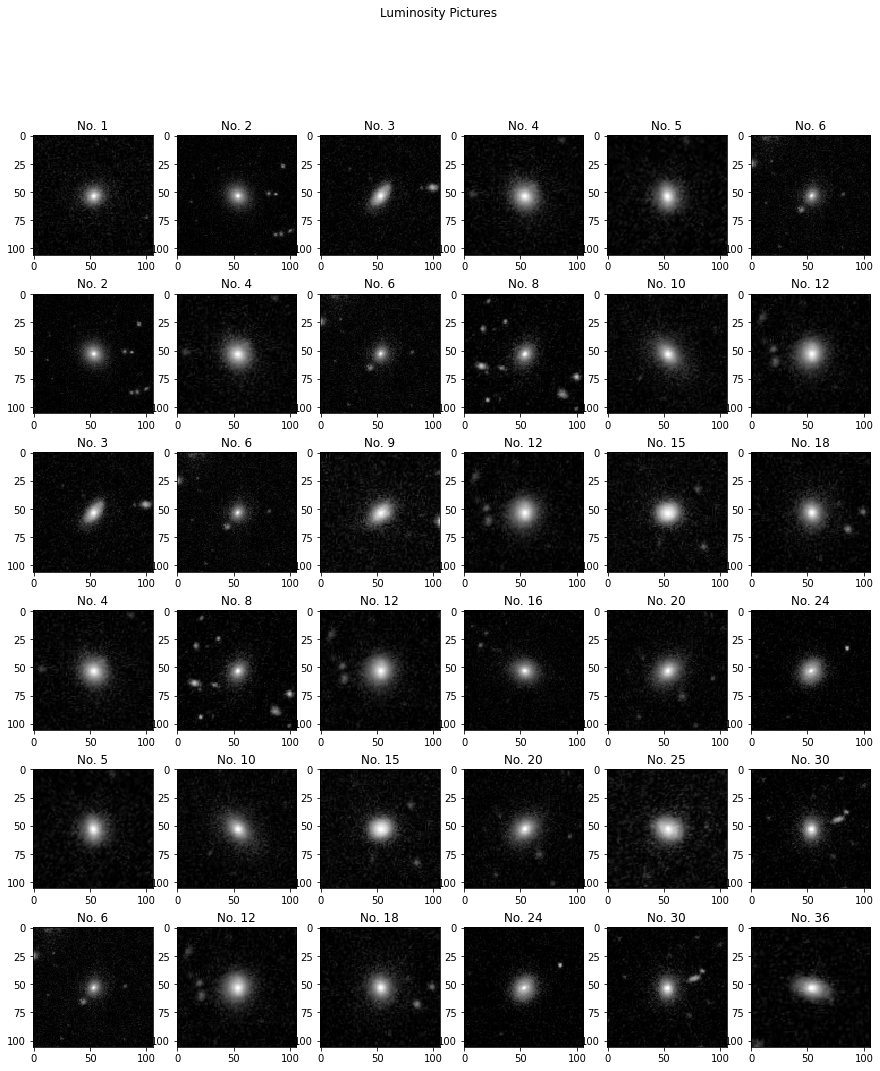

In [ ]:

fig, ax = plt.subplots(6, 6, figsize=[15,17])

for II in range(1,7):
  for JJ in range(1,7):
    ax[II-1, JJ-1].imshow(EllipLum[II*JJ-1, :, :])
    ax[II-1, JJ-1].set_title('No. {0}'.format(II*JJ))

plt.suptitle('Luminosity Pictures')

**Make a 6x6 panel plot of the first 36 spiral galaxies in both RGB and in luminosity.**

Text(0.5, 0.98, 'RGB Pictures')

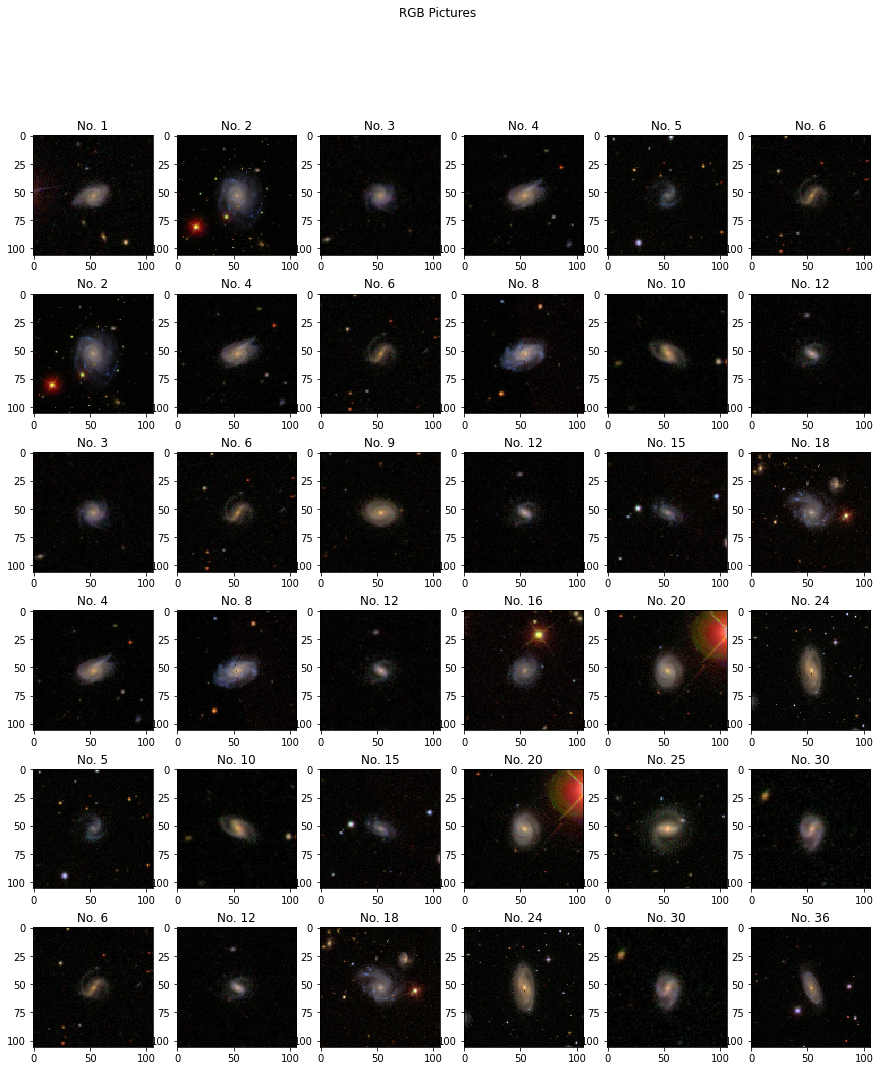

In [ ]:
fig, ax = plt.subplots(6, 6, figsize=[15,17])

for II in range(1,7):
  for JJ in range(1,7):
    ax[II-1, JJ-1].imshow(Spir[II*JJ-1, :, :, :])
    ax[II-1, JJ-1].set_title('No. {0}'.format(II*JJ))

plt.suptitle('RGB Pictures')

Text(0.5, 0.98, 'Luminosity Pictures')

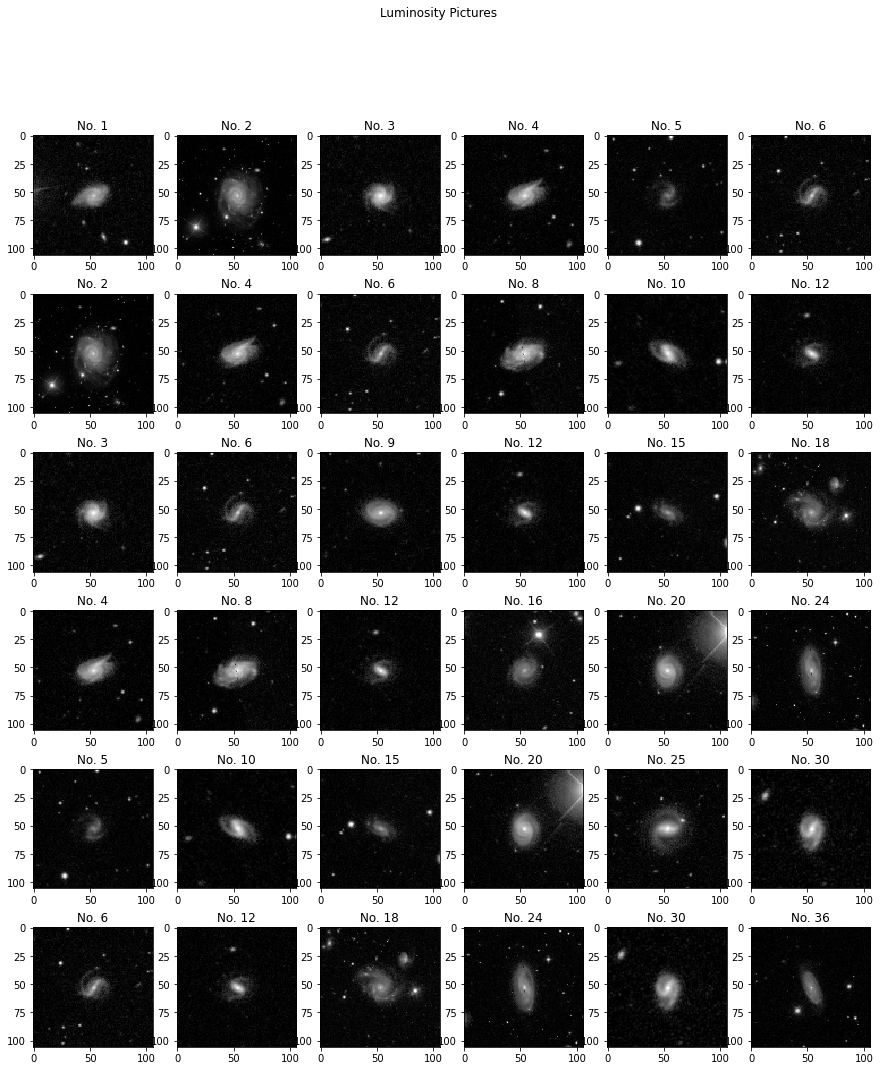

In [ ]:
fig, ax = plt.subplots(6, 6, figsize=[15,17])

for II in range(1,7):
  for JJ in range(1,7):
    ax[II-1, JJ-1].imshow(SpirLum[II*JJ-1, :, :])
    ax[II-1, JJ-1].set_title('No. {0}'.format(II*JJ))

plt.suptitle('Luminosity Pictures')

**Using the pixel luminosities of each image as features, train a decision tree classifier to classify elliptical vs spiral galaxies (attempting to minimize overfitting) and evaluate the model performance.$^{\dagger}$**

<small>$^{\dagger}$ Note, the full data set is quite large, you may want to reduce the total size of your training and testing set using the `train_size` and `test_size` keywords in the `train_test_split()` function. </small>

In [ ]:
#Let the elliptical be 0 and spiral be 1. 

Feat = np.concatenate((EllipLum.reshape(5000, 106*106), SpirLum.reshape(5000, 106*106)))
Targ = np.concatenate((np.full(5000, 0), np.full(5000, 1)))

In [ ]:
FeatTr, FeatTe, TargTr, TargTe = train_test_split(Feat, Targ, train_size=0.14, test_size=0.06)

In [ ]:
dtc = DecisionTreeClassifier(min_samples_leaf=50)

dtc.fit(FeatTr, TargTr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
PredTr = dtc.predict(FeatTr)
PredTe = dtc.predict(FeatTe)

AccTr = accuracy_score(TargTr, PredTr)
AccTe = accuracy_score(TargTe, PredTe)

print("training accuracy : {0}".format(AccTr))
print("testing accuracy : {0}".format(AccTe))

training accuracy : 0.83
testing accuracy : 0.8083333333333333


              precision    recall  f1-score   support

           0       0.79      0.85      0.82       308
           1       0.83      0.76      0.79       292

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



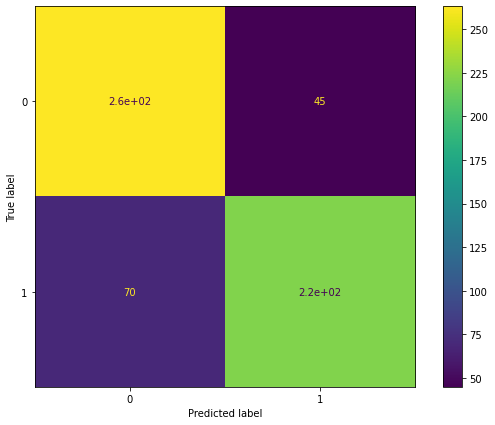

In [ ]:
plot_confusion_matrix(dtc, FeatTe, TargTe)
print(classification_report(TargTe, PredTe))

**Again using the pixel luminosities of each image as features, train a multi-layer perceptron to classify elliptical vs spiral galaxies and evaluate the model performance.**

In [ ]:
FeatTr, FeatTe, TargTr, TargTe = train_test_split(Feat, Targ, train_size=0.21, test_size=0.09)

In [ ]:
mlp = MLPClassifier((15))

In [ ]:
mlp.fit(FeatTr, TargTr)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=15, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

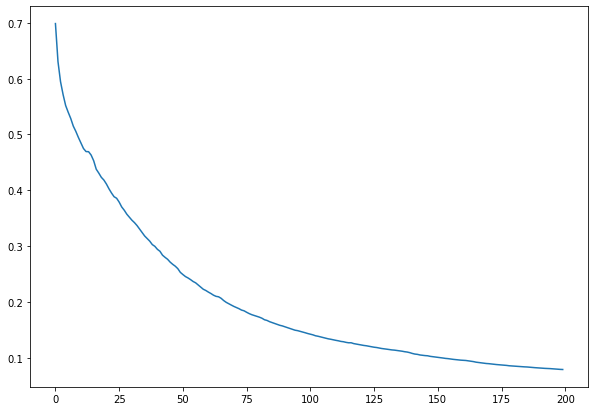

In [ ]:
plt.plot(mlp.loss_curve_)

In [ ]:
PredTr = mlp.predict(FeatTr)
PredTe = mlp.predict(FeatTe)

AccTr = accuracy_score(TargTr, PredTr)
AccTe = accuracy_score(TargTe, PredTe)

print("training accuracy : {0}".format(AccTr))
print("testing accuracy : {0}".format(AccTe))

training accuracy : 0.9876190476190476
testing accuracy : 0.7033333333333334


              precision    recall  f1-score   support

           0       0.72      0.61      0.66       424
           1       0.69      0.79      0.74       476

    accuracy                           0.70       900
   macro avg       0.71      0.70      0.70       900
weighted avg       0.71      0.70      0.70       900



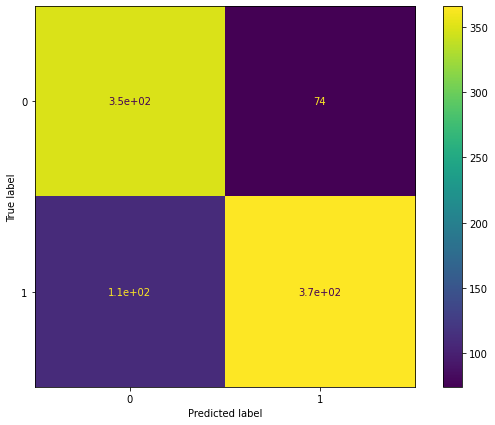

In [ ]:
plot_confusion_matrix(dtc, FeatTe, TargTe)
print(classification_report(TargTe, PredTe))